<a href="https://colab.research.google.com/github/Shreyaprashanth/Samsung__Innovation__Campus/blob/main/Placement(KNN_%26_SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kagglehub

In [2]:
import kagglehub
import pandas as pd
import os
###############################################################
# Specify the dataset identifier (user/dataset-name) and the file within the dataset
dataset_owner = "muhamedumarjamil"
dataset_name = "student-placement-data-with-cgpa-and-salary"
dataset_handle = f"{dataset_owner}/{dataset_name}"
###############################################################
# Download the dataset to a local directory
local_path = kagglehub.dataset_download(dataset_handle)
###############################################################
# List the contents of the downloaded directory to find the correct file path
print(f"Dataset downloaded to: {local_path}")
###############################################################
print("Contents of the dataset:")
###############################################################
for root, dirs, files in os.walk(local_path):
    level = root.replace(local_path, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f'{subindent}{f}')
###############################################################
# Once you find the correct file path, replace "SouthAfricaCrimeStats_v2.csv"
# with the correct path and uncomment the line below to load the data into a DataFrame.
file_path_within_dataset = "Placement.csv"
###############################################################
df = pd.read_csv(os.path.join(local_path, file_path_within_dataset))
###############################################################
# display(df.head())
df.head()

100%|██████████| 8.61k/8.61k [00:00<00:00, 9.37MB/s]

Extracting files...
Dataset downloaded to: /root/.cache/kagglehub/datasets/muhamedumarjamil/student-placement-data-with-cgpa-and-salary/versions/2
Contents of the dataset:
2/
    Placement.csv
    starter-code-eda.ipynb


,Student_ID,CGPA,Internships,Placed,Salary (INR LPA)
0,1,7.90,3,Yes,17.63
1,2,7.39,0,Yes,28.37
2,3,8.02,2,Yes,8.95
3,4,8.72,4,Yes,22.59
4,5,7.31,2,Yes,19.67


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is already loaded and contains 'CGPA', 'Internships', and 'Placed' columns
# Encode the 'Placed' column
le = LabelEncoder()
df['Placed_encoded'] = le.fit_transform(df['Placed'])

# Define features (X) and target (y)
X = df[['CGPA', 'Internships']]
y = df['Placed_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

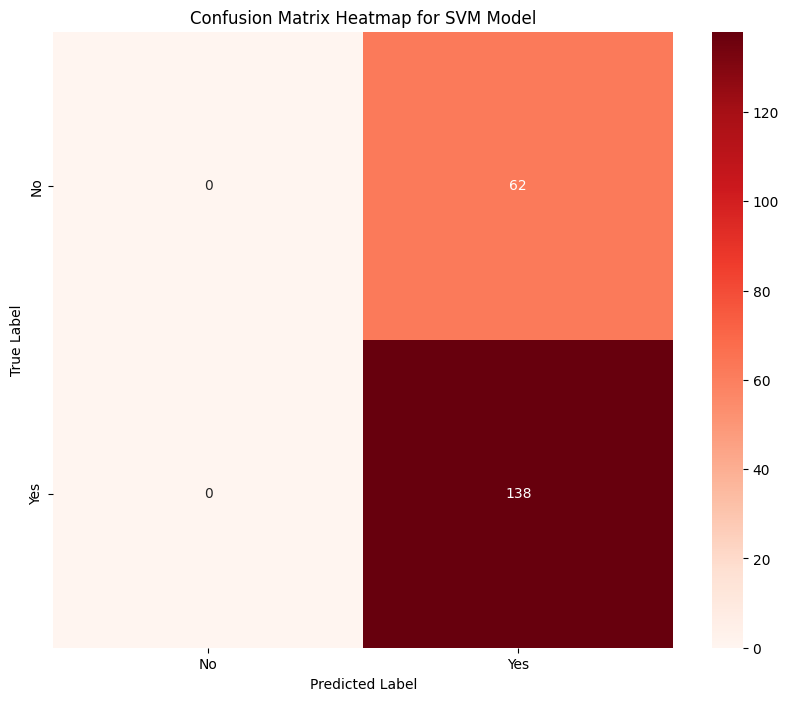

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix for the SVM model
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Reds', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap for SVM Model')
plt.show()

In [7]:
# Define features (X) and target (y) using the available columns
X = df[['CGPA', 'Internships']]
y = df['Placed_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [9]:
import time
from sklearn.neighbors import KNeighborsClassifier

start_time_knn = time.time()

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train_scaled, y_train)

end_time_knn = time.time()

In [10]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

y_pred_knn = knn_model.predict(X_test_scaled)

accuracy_knn = accuracy_score(y_test, y_pred_knn)


training_time_knn = end_time_knn - start_time_knn

print("=== K-Nearest Neighbors (KNN) ===")
print(f"Accuracy: {accuracy_knn:.4f}")

print(f"Training Time: {training_time_knn:.4f} seconds")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

=== K-Nearest Neighbors (KNN) ===
Accuracy: 0.6133
Training Time: 0.0167 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.22      0.25        86
           1       0.71      0.77      0.74       214

    accuracy                           0.61       300
   macro avg       0.50      0.50      0.49       300
weighted avg       0.59      0.61      0.60       300



In [11]:
import time
from sklearn.svm import SVC

start_time_svm = time.time()
svm_model = SVC(kernel='rbf',
                C=1.0,
                gamma='scale',
                random_state=42)

svm_model.fit(X_train_scaled, y_train)

end_time_svm = time.time()

In [12]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

y_pred_svm = svm_model.predict(X_test_scaled)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
training_time_svm = end_time_svm - start_time_svm
print("=== Support Vector Machine (SVM) ===")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Training Time: {training_time_svm:.4f} seconds")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

=== Support Vector Machine (SVM) ===
Accuracy: 0.7133
Training Time: 0.0415 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        86
           1       0.71      1.00      0.83       214

    accuracy                           0.71       300
   macro avg       0.36      0.50      0.42       300
weighted avg       0.51      0.71      0.59       300



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
